# Mini Project 5-2 Explore Probability Distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this Project, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [3]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as stats


A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [33]:
# RUN THIS CELL TO IMPORT YOUR DATA.
df = pd.read_csv("modified_c4_epa_air_quality.csv")
df.dropna()


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
...,...,...,...,...,...,...,...,...
254,2018-01-01,Arizona,Pima,Tucson,CHERRY & GLENN,Carbon monoxide,Parts per million,2.708050
255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,1.386294
256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,1.098612
257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,1.098612


## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [19]:
# Display first 10 rows of the data.
print(df[:10])

   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   
5  2018-01-01        Hawaii      Honolulu  Not in a city   
6  2018-01-01        Hawaii      Honolulu  Not in a city   
7  2018-01-01  Pennsylvania          Erie           Erie   
8  2018-01-01        Hawaii      Honolulu       Honolulu   
9  2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste 

The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [21]:
# Display number of rows, number of columns.
print("Number of rows:",len(df))
print("Number of columns:",len(df.columns))

Number of rows: 260
Number of columns: 8


Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

(array([ 2., 13., 58., 54., 42., 33., 28., 20.,  6.,  4.]),
 array([0.        , 0.39318256, 0.78636513, 1.17954769, 1.57273025,
        1.96591282, 2.35909538, 2.75227794, 3.14546051, 3.53864307,
        3.93182563]),
 <BarContainer object of 10 artists>)

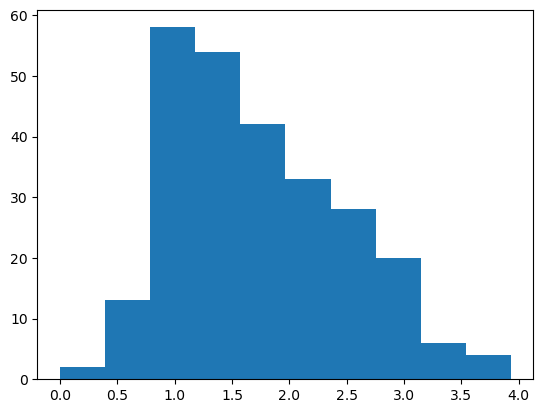

In [23]:
# Create a histogram to visualize distribution of aqi_log.
plt.hist(df["aqi_log"])

**Question:** What do you observe about the shape of the distribution from the histogram? 

A:

The histogram is somewhat concentrated around the mean (central tendency of 1), but has a positive skew.

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [25]:
# Define variable for aqi_log mean.
aqi_log_mean = df["aqi_log"].mean()

# Print out the mean.
print(aqi_log_mean)


1.7669210929985577


In [27]:
# Define variable for aqi_log standard deviation.
aqi_log_std = df["aqi_log"].std()
# Print out the standard deviation.
print(aqi_log_std)

0.7147155520223724


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [28]:
# Define variable for lower limit, 1 standard deviation below the mean.
aqi_low_lim = aqi_log_mean - aqi_log_std

# Define variable for upper limit, 1 standard deviation above the mean.
aqi_upper_lim = aqi_log_mean + aqi_log_std

# Display lower_limit, upper_limit.
print(aqi_low_lim)
print(aqi_upper_lim)

1.0522055409761855
2.48163664502093


In [46]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
df = df.dropna()
rows = len(df["aqi_log"])

in_range = df["aqi_log"].loc[(df["aqi_log"] <= aqi_upper_lim) & (df["aqi_log"] >= aqi_low_lim)]
percent_in_range = (len(in_range) / rows) * 100
print(percent_in_range)

75.87548638132296


Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [47]:
# Define variable for lower limit, 2 standard deviations below the mean.
aqi_low_2std = aqi_log_mean - (2 * aqi_log_std)


# Define variable for upper limit, 2 standard deviations below the mean.
aqi_upper_2std = aqi_log_mean + (2 * aqi_log_std)


# Display lower_limit, upper_limit.
print(aqi_low_2std)
print(aqi_upper_2std)

0.337489988953813
3.1963521970433026


In [45]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
within_2std = df["aqi_log"].loc[(df["aqi_log"] <= aqi_upper_2std) & (df["aqi_log"] >= aqi_low_2std)]
percent_in_2std = (len(within_2std) / rows) * 100
print(percent_in_2std)

95.71984435797665


Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [50]:
# Define variable for lower limit, 3 standard deviations below the mean.
aqi_low_3std = aqi_log_mean - (3 * aqi_log_std)

# Define variable for upper limit, 3 standard deviations above the mean.
aqi_upper_3std = aqi_log_mean + (3 * aqi_log_std)


# Display lower_limit, upper_limit.
print(aqi_low_3std)
print(aqi_upper_3std)


-0.3772255630685595
3.911067749065675


In [51]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
within_3std = df["aqi_log"].loc[(df["aqi_log"] <= aqi_upper_3std) & (df["aqi_log"] >= aqi_low_3std)]
percent_in_3std = (len(within_3std) / rows) * 100
print(percent_in_3std)


99.61089494163424


## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

A:

Applying the empirical rule in this way showed that the data is likely roughly normally distributed, as the proportions which are expected to fall within a given number of standard deviations from the mean in the case of a normal distribution were roughly the same as these values. Beyond determining whether the data is normally distributed, it gave an understanding of how centrally concentrated the data is.

**Question:** How would you use z-score to find outliers? 

A:

Z-scores could be used to find outliers, as the data could be iterated through and all values with a z-score greater than a certain cut-off point could be identified as outliers. For example, all points with z-scores greater than 2 may be considered outliers.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [53]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
df["z_score"] = (df["aqi_log"] - df["aqi_log"].mean()) / df["aqi_log"].std(ddof = 1)
 # ddof=degrees of freedom correction (sample vs. population)
z_score_ddof_0 = (df["aqi_log"] - df["aqi_log"].mean()) / df["aqi_log"].std(ddof = 0)
# Display the first 5 rows to ensure that the new column was added.
print(df["z_score"][:5])


0    0.433390
1    0.031879
2   -0.935531
3   -0.534020
4   -0.534020
Name: z_score, dtype: float64


Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [69]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
print(df[(df["z_score"] < -3) | (df["z_score"] > 3)])


     date_local state_name county_name city_name local_site_name  \
244  2018-01-01    Arizona    Maricopa   Phoenix    WEST PHOENIX   

      parameter_name   units_of_measure   aqi_log   z_score  aqi_log_filtered  \
244  Carbon monoxide  Parts per million  3.931826  3.018722               NaN   

     aqi_log_outliers  
244          3.931826  


**Question:** What do you observe about potential outliers based on the calculations?


A:

The outlier is from Phoenix, Arizona in 2018. The aqi_log value was 3.93 and it had a z-score of 3.019.

**Question:** Why is outlier detection an important part of this project? 

A:

Outlier detection is important in this case, as outliers are places with extremely good or bad air quality, which may be notable for further study.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

A:

I was refreshed on the syntax for the .iloc and .loc methods in the Pandas library, as I forgot the many ways in which pandas dataframes can be filtered for certain values or ranges. I specifically forgot that indexing pandas dataframes using square brackets was so flexible and accomodating to specific boolean filtering.

The importance of z-scores for filtering outliers and the exact formula for calculating z-scores was refreshed. I also had forgotten that each individual data point is said to have a z-score, as I typically interact with z-scores in the context of cutoffs, rather than the z-score of any particular value.

I was also reminded that even strongly skewed data may be distributed across standard deviation ranges in roughly the same way as a non-skewed normal distribution.

**What summary would you provide to audiences? Consider the distribution of the data and which sites would benefit from additional research.**

A:

The data has a quite positive skew. However, the data is distributed somewhat similarly to the normal distribution in terms of what proportion of the data falls within a certain number of standard deviations from the mean. This data is somewhat more clusted than the normal distribution. There are few outliers (only 1 when considering points with a z-score of 3 outliers), but these outliers should be closely studied, as these are the areas whose populations are most susceptible to poor air quality.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 